# Importação do banco de dados (atualizado)

In [1]:
#install.packages("readxl")
require(readxl)
bd<- read_excel("Analise heitor_02_10_21.xlsx",sheet = 2)
head(bd)
dim(bd) #72x40 (antes havia 71 variáveis)
str(bd)

Loading required package: readxl

Warning message:
"package 'readxl' was built under R version 3.6.3"


Caidor,Genero,idade,Nivel_social,etnia,Nivel_educacional,Freq_atividade,Criterio_AHA,Anti_hipertensivo,betabloqueador,...,Dinamometria,Berg,STS,Flexibilidade_Ms,Flexibilidade_MI,TUG_sec,DT_Sec,DT_numero_animais,quantidade_total_de_medicação,medicaçao_tipo_cardiovascular
<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
sim,mulher,76,b,branco,16,3x,c,não,sim,...,17.9,54,5,-29,-33,8.90,9.1,10,8,Beta + Anti_Coag
não,mulher,73,b,branco,16,3x,b,sim,sim,...,21.0,56,12,0,0,7.11,9.0,8,8,Beta + Anti_HAS
não,mulher,75,c,branco,12,2x,b,sim,sim,...,23.5,54,7,-7,-15,7.42,8.6,7,6,Beta + Anti_Coag
sim,mulher,83,b,branco,10,sedentario,c,sim,sim,...,15.3,51,9,-22,-4,10.52,11.9,7,8,Beta + Anti_Coag + Diu
não,mulher,83,a,branco,10,3x,c,sim,sim,...,16.7,56,NA,NA,-19,9.31,13.2,9,7,Beta + Anti_Coag + Diu
não,mulher,78,a,branco,12,2x,b,sim,sim,...,19.1,56,12,NA,0,7.17,8.7,6,4,Beta + Anti_HAS


[1] 72 40

tibble [72 x 40] (S3: tbl_df/tbl/data.frame)
 $ Caidor                       : chr [1:72] "sim" "não" "não" "sim" ...
 $ Genero                       : chr [1:72] "mulher" "mulher" "mulher" "mulher" ...
 $ idade                        : num [1:72] 76 73 75 83 83 78 83 82 78 75 ...
 $ Nivel_social                 : chr [1:72] "b" "b" "c" "b" ...
 $ etnia                        : chr [1:72] "branco" "branco" "branco" "branco" ...
 $ Nivel_educacional            : num [1:72] 16 16 12 10 10 12 20 8 14 16 ...
 $ Freq_atividade               : chr [1:72] "3x" "3x" "2x" "sedentario" ...
 $ Criterio_AHA                 : chr [1:72] "c" "b" "b" "c" ...
 $ Anti_hipertensivo            : chr [1:72] "não" "sim" "sim" "sim" ...
 $ betabloqueador               : chr [1:72] "sim" "sim" "sim" "sim" ...
 $ Anticoagulante_classif       : chr [1:72] "não" "não" "não" "sim" ...
 $ Diuretico_classif            : chr [1:72] "não" "não" "não" "sim" ...
 $ medicação_tipo_mental        : chr [1:72] "antidepres

# Pré-processamento dos dados

In [2]:
bd[] <- lapply(bd, as.factor) #Transforma todo o banco de dados em fator
bd[,c("idade","Nivel_educacional","Tempo_doença","MMSE","Fluencia_verbal","Trilhas_A","Trilhas_b","GDS","FES_I","Vsaq","Vo2_maximo_avaliado","IMC","Dinamometria","Berg","STS","Flexibilidade_Ms","Flexibilidade_MI","TUG_sec","DT_Sec","DT_numero_animais","quantidade_total_de_medicação")] <- lapply(bd[,c("idade","Nivel_educacional","Tempo_doença","MMSE","Fluencia_verbal","Trilhas_A","Trilhas_b","GDS","FES_I","Vsaq","Vo2_maximo_avaliado","IMC","Dinamometria","Berg","STS","Flexibilidade_Ms","Flexibilidade_MI","TUG_sec","DT_Sec","DT_numero_animais","quantidade_total_de_medicação")], as.numeric) 
str(bd)

tibble [72 x 40] (S3: tbl_df/tbl/data.frame)
 $ Caidor                       : Factor w/ 2 levels "não","sim": 2 1 1 2 1 1 2 1 1 2 ...
 $ Genero                       : Factor w/ 2 levels "homem","mulher": 2 2 2 2 2 2 2 2 2 1 ...
 $ idade                        : num [1:72] 17 14 16 24 24 19 24 23 19 16 ...
 $ Nivel_social                 : Factor w/ 4 levels "a","b","c","d": 2 2 3 2 1 1 2 2 3 2 ...
 $ etnia                        : Factor w/ 2 levels "branco","preto": 1 1 1 1 1 1 2 1 1 1 ...
 $ Nivel_educacional            : num [1:72] 6 6 3 2 2 3 8 1 4 6 ...
 $ Freq_atividade               : Factor w/ 3 levels "2x","3x","sedentario": 2 2 1 3 2 1 2 1 1 1 ...
 $ Criterio_AHA                 : Factor w/ 2 levels "b","c": 2 1 1 2 2 1 2 1 1 2 ...
 $ Anti_hipertensivo            : Factor w/ 2 levels "não","sim": 1 2 2 2 2 2 1 1 1 2 ...
 $ betabloqueador               : Factor w/ 2 levels "não","sim": 2 2 2 2 2 2 2 1 2 2 ...
 $ Anticoagulante_classif       : Factor w/ 2 levels "não","sim": 

In [3]:
table(bd$Caidor) #(48 não e 24 sim)
BD<- na.omit(bd) 
dim(BD) #52 idosos após remoção dos Nas
table(BD$Caidor) #(33 não e 19 sim)


não sim 
 48  24 

[1] 52 40


não sim 
 33  19 

# Análise descritiva

In [35]:
#N total
#Mínimo, máximo, média, mediana e intervalo quartil das variáveis (numéricas)
sapply(bd,summary)
#Desvio padrão
sapply(bd[,c("idade","Nivel_educacional","Tempo_doença","MMSE","Fluencia_verbal","Trilhas_A","Trilhas_b","GDS","FES_I","Vsaq","Vo2_maximo_avaliado","IMC","Dinamometria","Berg","STS","Flexibilidade_Ms","Flexibilidade_MI","TUG_sec","DT_Sec","DT_numero_animais","quantidade_total_de_medicação")],sd)

$Caidor
não sim 
 48  24 

$Genero
 homem mulher 
    43     29 

$idade
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00   10.00   16.00   15.42   20.25   27.00 

$Nivel_social
 a  b  c  d 
12 43 16  1 

$etnia
branco  preto 
    61     11 

$Nivel_educacional
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   4.000   6.000   5.514   6.250  10.000 

$Freq_atividade
        2x         3x sedentario 
        21         34         17 

$Criterio_AHA
 b  c 
49 23 

$Anti_hipertensivo
não sim 
 15  57 

$betabloqueador
não sim 
  6  66 

$Anticoagulante_classif
não sim 
 41  31 

$Diuretico_classif
não sim 
 48  24 

$medicação_tipo_mental
         ansiolitico       antidepressivo antidepressivo+benzo 
                   2                    5                    8 
    benzodiazepinico                  não 
                  28                   29 

$medicação_tipo_saude
 cardio+mental cardiovascular 
            43             29 

$antidepressivo
não sim 
 61  11 

$ansi

idade             Nivel_educacional 
                     6.677163                      2.194699 
                 Tempo_doença                          MMSE 
                     5.545780                            NA 
              Fluencia_verbal                     Trilhas_A 
                     5.368994                            NA 
                    Trilhas_b                           GDS 
                           NA                            NA 
                        FES_I                          Vsaq 
                           NA                      1.618010 
          Vo2_maximo_avaliado                           IMC 
                           NA                     11.607959 
                 Dinamometria                          Berg 
                    13.635399                      2.914234 
                          STS              Flexibilidade_Ms 
                           NA                            NA 
             Flexibilidade_MI                       TUG_sec 
                           NA                            NA 
                       DT_Sec             DT_numero_animais 
                           NA                            NA 
quantidade_total_de_medicação 
                     2.229365

In [31]:
#Dividindo as amostras (caso x controle)
controle<- grep("não",bd$Caidor)
caso<- grep("sim",bd$Caidor)
bd_controle<- bd[controle,]
bd_caso<- bd[caso,]
dim(bd_controle)
dim(bd_caso)

#Mínimo, máximo, média, mediana e intervalo quartil das variáveis (numéricas)
sapply(bd_controle,summary)
sapply(bd_caso,summary)

[1] 48 40

[1] 24 40

$Caidor
não sim 
 48   0 

$Genero
 homem mulher 
    28     20 

$idade
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    8.75   14.00   14.15   20.00   26.00 

$Nivel_social
 a  b  c  d 
 9 28 11  0 

$etnia
branco  preto 
    42      6 

$Nivel_educacional
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   4.000   6.000   5.667   6.250  10.000 

$Freq_atividade
        2x         3x sedentario 
        11         24         13 

$Criterio_AHA
 b  c 
39  9 

$Anti_hipertensivo
não sim 
  8  40 

$betabloqueador
não sim 
  6  42 

$Anticoagulante_classif
não sim 
 36  12 

$Diuretico_classif
não sim 
 38  10 

$medicação_tipo_mental
         ansiolitico       antidepressivo antidepressivo+benzo 
                   1                    3                    4 
    benzodiazepinico                  não 
                  15                   25 

$medicação_tipo_saude
 cardio+mental cardiovascular 
            23             25 

$antidepressivo
não sim 
 43   5 

$ansi

$Caidor
não sim 
  0  24 

$Genero
 homem mulher 
    15      9 

$idade
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   6.00   15.00   17.50   17.96   22.25   27.00 

$Nivel_social
 a  b  c  d 
 3 15  5  1 

$etnia
branco  preto 
    19      5 

$Nivel_educacional
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   3.000   6.000   5.208   6.250   9.000 

$Freq_atividade
        2x         3x sedentario 
        10         10          4 

$Criterio_AHA
 b  c 
10 14 

$Anti_hipertensivo
não sim 
  7  17 

$betabloqueador
não sim 
  0  24 

$Anticoagulante_classif
não sim 
  5  19 

$Diuretico_classif
não sim 
 10  14 

$medicação_tipo_mental
         ansiolitico       antidepressivo antidepressivo+benzo 
                   1                    2                    4 
    benzodiazepinico                  não 
                  13                    4 

$medicação_tipo_saude
 cardio+mental cardiovascular 
            20              4 

$antidepressivo
não sim 
 18   6 

$ansi

In [34]:
#Desvio padrão
sapply(bd_controle[,c("idade","Nivel_educacional","Tempo_doença","MMSE","Fluencia_verbal","Trilhas_A","Trilhas_b","GDS","FES_I","Vsaq","Vo2_maximo_avaliado","IMC","Dinamometria","Berg","STS","Flexibilidade_Ms","Flexibilidade_MI","TUG_sec","DT_Sec","DT_numero_animais","quantidade_total_de_medicação")],sd)
sapply(bd_caso[,c("idade","Nivel_educacional","Tempo_doença","MMSE","Fluencia_verbal","Trilhas_A","Trilhas_b","GDS","FES_I","Vsaq","Vo2_maximo_avaliado","IMC","Dinamometria","Berg","STS","Flexibilidade_Ms","Flexibilidade_MI","TUG_sec","DT_Sec","DT_numero_animais","quantidade_total_de_medicação")],sd)

idade             Nivel_educacional 
                     7.001488                      2.127163 
                 Tempo_doença                          MMSE 
                     5.390924                            NA 
              Fluencia_verbal                     Trilhas_A 
                     5.545708                            NA 
                    Trilhas_b                           GDS 
                           NA                            NA 
                        FES_I                          Vsaq 
                           NA                      1.522875 
          Vo2_maximo_avaliado                           IMC 
                           NA                     11.774006 
                 Dinamometria                          Berg 
                    13.643495                      2.175684 
                          STS              Flexibilidade_Ms 
                           NA                            NA 
             Flexibilidade_MI                       TUG_sec 
                           NA                            NA 
                       DT_Sec             DT_numero_animais 
                           NA                            NA 
quantidade_total_de_medicação 
                     2.125391

idade             Nivel_educacional 
                     5.229342                      2.340181 
                 Tempo_doença                          MMSE 
                     5.744405                      2.358687 
              Fluencia_verbal                     Trilhas_A 
                     4.323847                     14.486813 
                    Trilhas_b                           GDS 
                    13.114255                      4.734816 
                        FES_I                          Vsaq 
                     5.160468                      1.752328 
          Vo2_maximo_avaliado                           IMC 
                           NA                     11.515270 
                 Dinamometria                          Berg 
                    13.448708                      3.562079 
                          STS              Flexibilidade_Ms 
                           NA                            NA 
             Flexibilidade_MI                       TUG_sec 
                     5.221021                     11.475162 
                       DT_Sec             DT_numero_animais 
                     8.029723                      2.119612 
quantidade_total_de_medicação 
                     2.307832

# Testes de normalidade (kolmogorov-Smirnov) e de homocedasticidade (Levene)

In [ ]:
pairs

# RFE-RF

Loading required package: caret

Loading required package: ggplot2


Attaching package: 'ggplot2'


The following object is masked from 'package:randomForest':

    margin


Loading required package: lattice




Recursive feature selection

Outer resampling method: Cross-Validated (5 fold) 

Resampling performance over subset size:

 Variables Accuracy  Kappa AccuracySD KappaSD Selected
         2   0.6897 0.2919    0.08565 0.20655         
         3   0.7075 0.3482    0.09058 0.20640         
         4   0.6915 0.2935    0.03965 0.13622         
         5   0.7479 0.4211    0.06145 0.15355         
         6   0.7701 0.4847    0.04163 0.07592        *
         7   0.6897 0.2605    0.08565 0.23236         
         8   0.7079 0.2938    0.10342 0.27300         
         9   0.7079 0.3120    0.08102 0.22171         
        10   0.7079 0.3120    0.08102 0.22171         
        11   0.7119 0.3241    0.09233 0.24843         
        12   0.7079 0.3120    0.08102 0.22171         
        13   0.7079 0.3120    0.08102 0.22171         
        14   0.7079 0.3120    0.08102 0.22171         
        15   0.6897 0.2794    0.08565 0.22168         
        16   0.6915 0.2861    0.09918 0.23166      

[1] "Berg"                          "medicaçao_tipo_cardiovascular"
[3] "DT_Sec"                        "Diuretico_classif"            
[5] "Anticoagulante_classif"        "Fluencia_verbal"

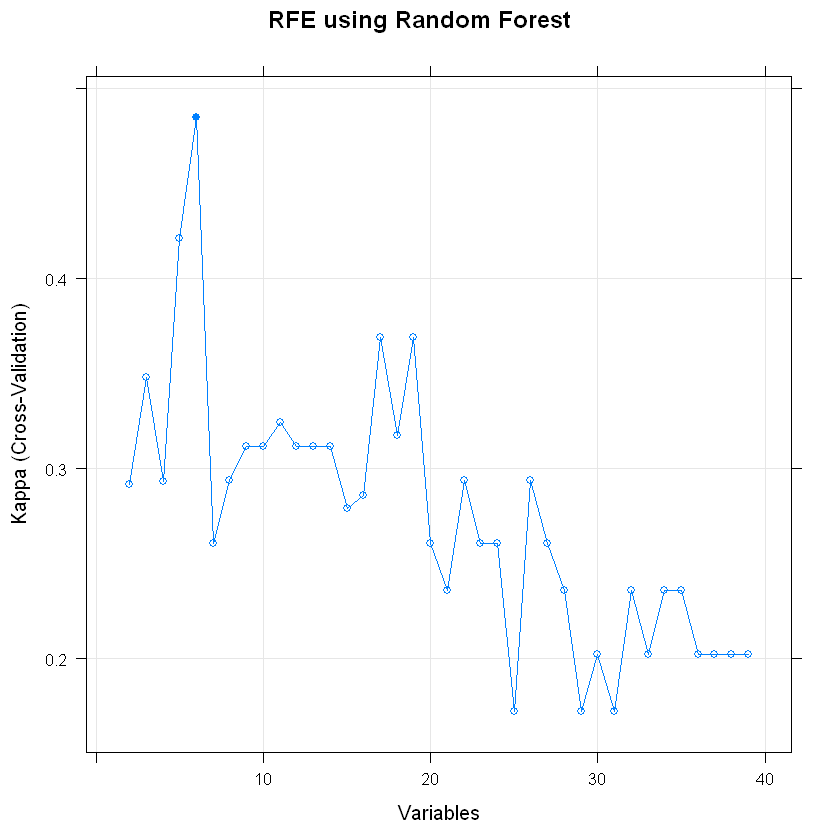

In [7]:
#define the control using a random forest selection function
#install.packages("caret")
require(caret)
#install.packages("e1071")
require(e1071)
#install.packages("randomForest")
require(randomForest)
set.seed(1)
control2 <- rfeControl(functions=rfFuncs, method="cv", number=5)
set.seed(2)
results <- rfe(BD[,2:40], BD[[1]], sizes=c(2:40),rfeControl=control2,metric="Kappa") 
print(results) 
#list the chosen features
predictors(results) 
#plot the results
plot(results, type=c("g", "o"),main="RFE using Random Forest")

## RF a partir do RFE-RF

Caidor,Berg,medicaçao_tipo_cardiovascular,DT_Sec,Diuretico_classif,Anticoagulante_classif,Fluencia_verbal
<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<dbl>
sim,11,Beta + Anti_Coag,26,não,não,17
não,11,Beta + Anti_Coag,22,não,não,5
sim,9,Beta + Anti_Coag + Diu,32,sim,sim,10
sim,11,Beta,27,não,sim,9
não,12,Beta,23,não,sim,8
não,12,Beta,8,não,não,10


Random Forest 

52 samples
 6 predictor
 2 classes: 'não', 'sim' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 42, 41, 42, 41, 42 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
  2     0.6927273  0.3182279
  5     0.7145455  0.3664541
  9     0.7345455  0.4135556

Kappa was used to select the optimal model using the largest value.
The final value used for the model was mtry = 9.


Call:
 randomForest(x = x, y = y, mtry = min(param$mtry, ncol(x))) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 9

        OOB estimate of  error rate: 28.85%
Confusion matrix:
    não sim class.error
não  26   7   0.2121212
sim   8  11   0.4210526

rf variable importance

                                                    Overall
DT_Sec                                              100.000
Berg                                                 85.904
Fluencia_verbal                                      38.469
Anticoagulante_classifsim                            27.459
medicaçao_tipo_cardiovascularBeta + Anti_Coag + Diu  23.242
Diuretico_classifsim                                 11.159
medicaçao_tipo_cardiovascularBeta + Anti_Coag         9.324
medicaçao_tipo_cardiovascularBeta + Anti_HAS          6.980
medicaçao_tipo_cardiovascularBeta                     0.000

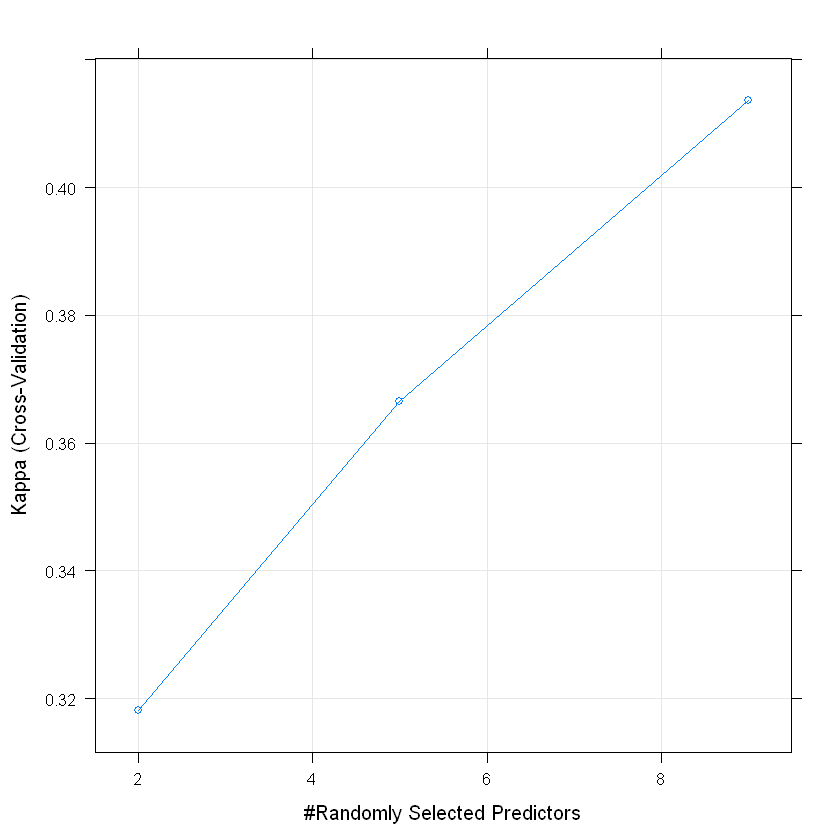

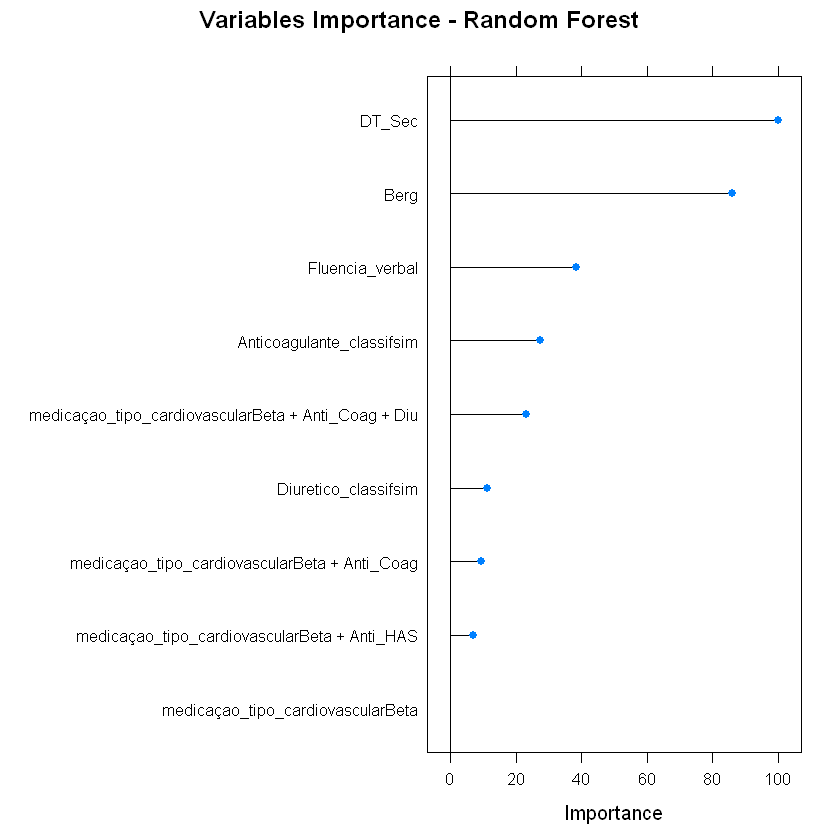

In [10]:
BD_RF_rfe<- BD[,c("Caidor","Berg",
                               "medicaçao_tipo_cardiovascular","DT_Sec","Diuretico_classif","Anticoagulante_classif","Fluencia_verbal")]
head(BD_RF_rfe)
set.seed(4)
RFmodel=train(Caidor~.,data=BD_RF_rfe,method='rf',metric=ifelse(is.factor(BD_RF_rfe$Caidor),"Kappa","RMSE"),trControl=trainControl(method='cv',number=5,savePredictions=TRUE))
RFmodel #Acurácia= 81.42% e kappa= 59.33%
plot(RFmodel)
RFmodel$finalModel #Acurácia= 81.58% 
varImp(RFmodel)
plot(varImp(RFmodel),main="Variables Importance - Random Forest")

# RL com as variáveis resultantes do RFE-RF

In [14]:
set.seed(21)
RL_model2<- glm(BD_RF_rfe$Caidor~.,data=BD_RF_rfe, family = 'binomial')
summary(RL_model2)


Call:
glm(formula = BD_RF_rfe$Caidor ~ ., family = "binomial", data = BD_RF_rfe)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.00637  -0.36307  -0.06704   0.27439   1.94415  

Coefficients:
                                                      Estimate Std. Error
(Intercept)                                          -12.67910 2184.60860
Berg                                                  -0.47575    0.30622
medicaçao_tipo_cardiovascularBeta                     16.50748 2184.60557
medicaçao_tipo_cardiovascularBeta + Anti_Coag         17.95017 2184.60563
medicaçao_tipo_cardiovascularBeta + Anti_Coag + Diu   15.81050 2184.60582
medicaçao_tipo_cardiovascularBeta + Anti_HAS          12.70550 2184.60791
DT_Sec                                                 0.06159    0.06080
Diuretico_classifsim                                   2.28974    1.64243
Anticoagulante_classifsim                              1.36817    1.00891
Fluencia_verbal                        